In [4]:
import numpy as np
import DMemu
import matplotlib.pyplot as plt
from time import time

In [5]:
# load emulator
emul = DMemu.TBDemu()

In [6]:
# print parameter range
emul.print_parameter_space()

k: k<6 (h/Mpc)
z: z<2.35
f: f in [0,1]
vk: vk in [0,5000] (km/s)
Gamma: Gamma in [0,1/13.5] (1/Gyr)


In [7]:
# predict suppressions for three different scales at three different redshifts
k = np.array([1,2,4]) # in h/Mpc
z = np.array([0.0,1.0,2.0])
print(emul.predict(k,z,1.0,1000,1/50))

[0.76864688 0.81255819 0.86277006]


[emulator.predict] Warning: Extrapolation required! Make sure you know what is hapenning.
ellapsed: 0.012387990951538086


Text(0, 0.5, '$P_{\\rm DDM}/P_{\\Lambda \\rm CDM}$')

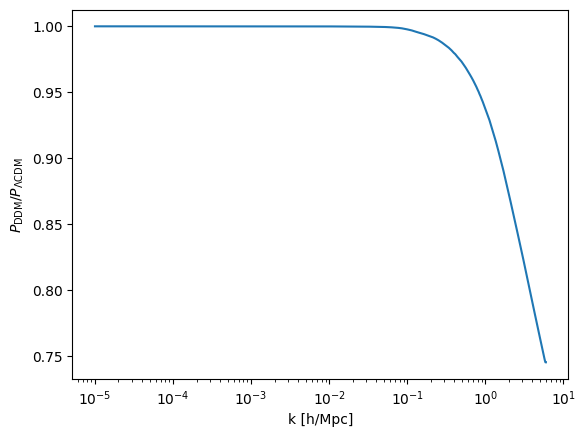

In [11]:
# predict suppressions between kmin and kmax for a single redshift
kmin = 1e-5
kmax = 6 # in h/Mpc, larger than 5.9 h/Mpc what is maximum k
ks = np.logspace(np.log10(kmin),np.log10(kmax),1000)
zs = 0.0

velocity_kick = 500
gamma_decay = 1/50
f = 1.0

st = time()
pks = emul.predict(ks,zs,f,velocity_kick,gamma_decay)
print('ellapsed:',time() - st)

# plot
plt.semilogx(ks,pks)
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$P_{\rm DDM}/P_{\Lambda \rm CDM}$')

In [9]:
# predict suppression for a single scale and different redshifts
k = 0.50 # h/Mpc
zs = [2.0,1.0,0.0,2.35]
v = 1000
gamma = 1/50
f = 1.0

st = time()
pks = emul.predict(k,zs,f,v,gamma)
print('ellapsed:',time() - st)
print('got Pk:',pks)

ellapsed: 0.012796878814697266
got Pk: [0.96082824 0.93001912 0.87117483 0.96720961]
